In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from pycountry import countries
import numpy as np
from plotly.subplots import make_subplots
import statsmodels.api as sm
import pingouin as pg


In [97]:
# Emissions data is CO2 emissions, traffic the total passengers, Tourism the Nights spent at tourist accommodation establishments, 
# and aviation the total freight and mail on board exported monthly

emissions = pd.read_csv('Datasets/emissions.csv')
traffic = pd.read_csv('Datasets/traffic.csv')
tourism = pd.read_csv('Datasets/tourism.csv')
supply = pd.read_csv('Datasets/aviation_freight.csv')

### Schiphol, The Netherlands

In [98]:
traffic_NL = traffic[
    (traffic['rep_airp'] == 'NL_EHAM') &
    (traffic['unit'] == 'NR') &
    (traffic['TIME_PERIOD'] >= '2019-02')                   
]

emissions_NL = emissions[
    (emissions['geo'] == 'NL_CAP') &
    (emissions['TIME_PERIOD'] >= '2019-02')
]

tourism_NL = tourism[
    (tourism['geo'] == 'NL') &
    (tourism['unit'] == 'NR') &
    (tourism['nace_r2'] == 'I551') &
    (tourism['c_resid'] == 'TOTAL') &
    (tourism['TIME_PERIOD'] >= '2019-02')
]

supply_NL = supply[
    (supply['geo'] == 'NL') &
    (supply['tra_meas'] == 'FRM_BRD') & 
    (supply['TIME_PERIOD'] >= '2019-02')
]

In [99]:
fig = make_subplots(rows=3, cols=1,
                    shared_xaxes=True,
                    subplot_titles=('Air passenger vs Emissions', 'Air passenger vs Tourism', 'Air passenger vs Freight'),
                    vertical_spacing=0.1,
                    specs=[[{'secondary_y': True}],
                           [{'secondary_y': True}],
                           [{'secondary_y': True}]])

# For Traffic vs Emissions
fig.add_trace(go.Scatter(
    x=traffic_NL['TIME_PERIOD'],
    y=traffic_NL['OBS_VALUE'],
    name='Air passenger',
    line=dict(color='blue'),
), row=1, col=1, secondary_y=True)

fig.add_trace(go.Scatter(
    x=emissions_NL['TIME_PERIOD'],
    y=emissions_NL['OBS_VALUE'],
    name="Emissions (NO_2)",
    line=dict(color='green'),
), row=1, col=1, secondary_y=False)

# For Traffic vs Tourism
fig.add_trace(go.Scatter(
    x=traffic_NL['TIME_PERIOD'],
    y=traffic_NL['OBS_VALUE'],
    showlegend=False,  
    line=dict(color='blue'),
), row=2, col=1, secondary_y=True)

fig.add_trace(go.Scatter(
    x=tourism_NL['TIME_PERIOD'],
    y=tourism_NL['OBS_VALUE'],
    name='Tourism',
    line=dict(color='red'),
), row=2, col=1, secondary_y=False)

# For Traffic vs Freight
fig.add_trace(go.Scatter(
    x=traffic_NL['TIME_PERIOD'],
    y=traffic_NL['OBS_VALUE'],
    showlegend=False, 
    line=dict(color='blue'),
), row=3, col=1, secondary_y=True)

fig.add_trace(go.Scatter(
    x=supply_NL['TIME_PERIOD'],
    y=supply_NL['OBS_VALUE'],
    name='Freight NL',
    line=dict(color='black'),
), row=3, col=1, secondary_y=False)

fig.update_layout(
    title_text='Impact of COVID-19 on Different Sectors in The Netherlands',
    height=900 
)

fig.add_vline(x='2020-02', line_width=2, line_color='red', line_dash='dot')
fig.add_annotation(
    dict(
        x='2020-02-01',
        y=1.05,  
        xref='x',
        yref='paper',
        text='Begin COVID-19',  
        showarrow=False,
        font=dict(
            family='Courier New, monospace',
            size=16,
            color='red'
        ),
        ax=0,  
        ay=0
    )
)

fig.show()


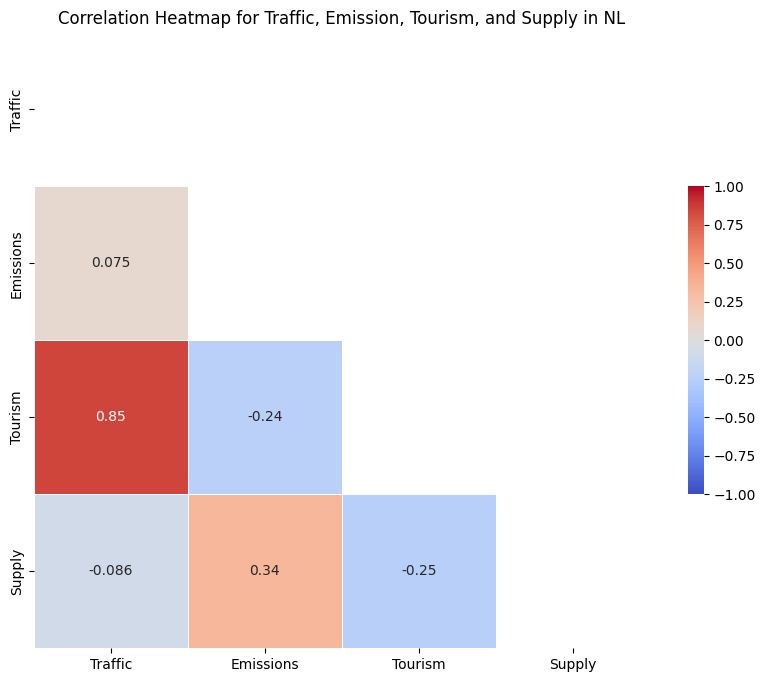

In [100]:
# Merge the dataframes based on the TIME_PERIOD column
merged_NL = traffic_NL[['TIME_PERIOD', 'OBS_VALUE']].rename(columns={'OBS_VALUE': 'Traffic'})
merged_NL = pd.merge(merged_NL, emissions_NL[['TIME_PERIOD', 'OBS_VALUE']], on='TIME_PERIOD', how='left').rename(columns={'OBS_VALUE': 'Emissions'})
merged_NL = pd.merge(merged_NL, tourism_NL[['TIME_PERIOD', 'OBS_VALUE']], on='TIME_PERIOD', how='left').rename(columns={'OBS_VALUE': 'Tourism'})
merged_NL = pd.merge(merged_NL, supply_NL[['TIME_PERIOD', 'OBS_VALUE']], on='TIME_PERIOD', how='left').rename(columns={'OBS_VALUE': 'Supply'})

corr = merged_NL.drop(columns='TIME_PERIOD').corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation Heatmap for Traffic, Emission, Tourism, and Supply in NL')
plt.show()


### France


In [101]:
traffic_FR = traffic[
    (traffic['rep_airp'] == 'FR_FMCZ') &
    (traffic['unit'] == 'NR') &
    (traffic['TIME_PERIOD'] >= '2019-02')                   
]

emissions_FR = emissions[
    (emissions['geo'] == 'FR_CAP') &
    (emissions['TIME_PERIOD'] >= '2019-02')
]

tourism_FR = tourism[
    (tourism['geo'] == 'FR') &
    (tourism['unit'] == 'NR') &
    (tourism['nace_r2'] == 'I551') &
    (tourism['c_resid'] == 'TOTAL') &
    (tourism['TIME_PERIOD'] >= '2019-02')
]

supply_FR = supply[
    (supply['geo'] == 'FR') &
    (supply['tra_meas'] == 'FRM_BRD') & 
    (supply['TIME_PERIOD'] >= '2019-02')
]

In [102]:
fig = make_subplots(rows=3, cols=1,
                    shared_xaxes=True,
                    subplot_titles=('Air passenger vs Emissions', 'Air passenger vs Tourism', 'Air passenger vs Freight'),
                    vertical_spacing=0.1,
                    specs=[[{'secondary_y': True}],
                           [{'secondary_y': True}],
                           [{'secondary_y': True}]])

# For Traffic vs Emissions
fig.add_trace(go.Scatter(
    x=traffic_FR['TIME_PERIOD'],
    y=traffic_FR['OBS_VALUE'],
    name='Air passenger',
    line=dict(color='blue'),
), row=1, col=1, secondary_y=True)

fig.add_trace(go.Scatter(
    x=emissions_FR['TIME_PERIOD'],
    y=emissions_FR['OBS_VALUE'],
    name="Emissions (NO_2)",
    line=dict(color='green'),
), row=1, col=1, secondary_y=False)

# For Traffic vs Tourism
fig.add_trace(go.Scatter(
    x=traffic_FR['TIME_PERIOD'],
    y=traffic_FR['OBS_VALUE'],
    showlegend=False,  
    line=dict(color='blue'),
), row=2, col=1, secondary_y=True)

fig.add_trace(go.Scatter(
    x=tourism_FR['TIME_PERIOD'],
    y=tourism_FR['OBS_VALUE'],
    name='Tourism',
    line=dict(color='red'),
), row=2, col=1, secondary_y=False)

# For Traffic vs Freight
fig.add_trace(go.Scatter(
    x=traffic_FR['TIME_PERIOD'],
    y=traffic_FR['OBS_VALUE'],
    showlegend=False, 
    line=dict(color='blue'),
), row=3, col=1, secondary_y=True)

fig.add_trace(go.Scatter(
    x=supply_FR['TIME_PERIOD'],
    y=supply_FR['OBS_VALUE'],
    name='Freight NL',
    line=dict(color='black'),
), row=3, col=1, secondary_y=False)

fig.update_layout(
    title_text='Impact of COVID-19 on Different Sectors in France',
    height=900 
)

fig.add_vline(x='2020-02', line_width=2, line_color='red', line_dash='dot')
fig.add_annotation(
    dict(
        x='2020-02-01',
        y=1.05,  
        xref='x',
        yref='paper',
        text='Begin COVID-19',  
        showarrow=False,
        font=dict(
            family='Courier New, monospace',
            size=16,
            color='red'
        ),
        ax=0,  
        ay=0
    )
)

fig.show()


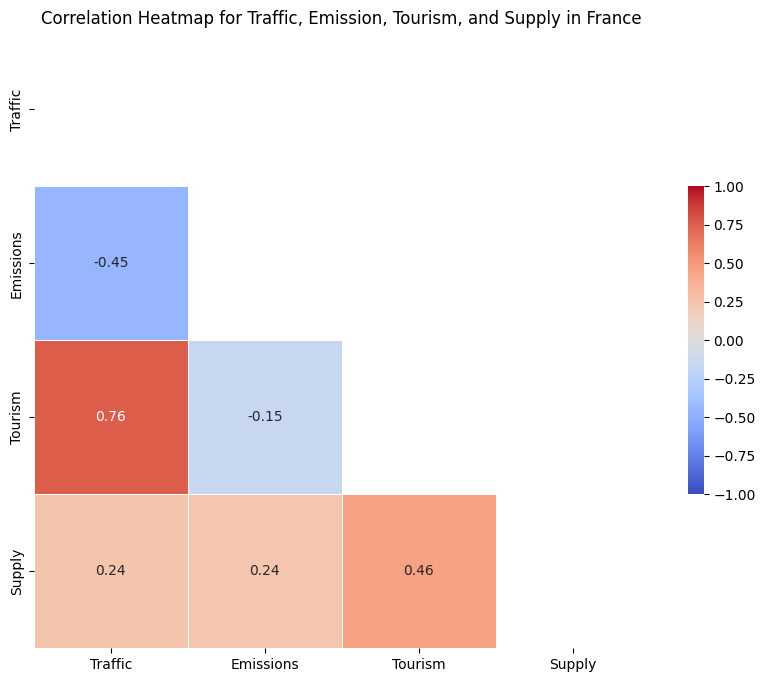

In [103]:
# Merge the dataframes based on the TIME_PERIOD column
merged_FR = traffic_FR[['TIME_PERIOD', 'OBS_VALUE']].rename(columns={'OBS_VALUE': 'Traffic'})
merged_FR = pd.merge(merged_FR, emissions_FR[['TIME_PERIOD', 'OBS_VALUE']], on='TIME_PERIOD', how='left').rename(columns={'OBS_VALUE': 'Emissions'})
merged_FR = pd.merge(merged_FR, tourism_FR[['TIME_PERIOD', 'OBS_VALUE']], on='TIME_PERIOD', how='left').rename(columns={'OBS_VALUE': 'Tourism'})
merged_FR = pd.merge(merged_FR, supply_FR[['TIME_PERIOD', 'OBS_VALUE']], on='TIME_PERIOD', how='left').rename(columns={'OBS_VALUE': 'Supply'})

corr = merged_FR.drop(columns='TIME_PERIOD').corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation Heatmap for Traffic, Emission, Tourism, and Supply in France')
plt.show()


### Bulgaria

In [104]:
traffic_BG = traffic[
    (traffic['rep_airp'] == 'BG_LBBG') &
    (traffic['unit'] == 'NR') &
    (traffic['TIME_PERIOD'] >= '2019-02')                   
]

emissions_BG = emissions[
    (emissions['geo'] == 'BG_CAP') &
    (emissions['TIME_PERIOD'] >= '2019-02')
]

tourism_BG = tourism[
    (tourism['geo'] == 'BG') &
    (tourism['unit'] == 'NR') &
    (tourism['nace_r2'] == 'I551') &
    (tourism['c_resid'] == 'TOTAL') &
    (tourism['TIME_PERIOD'] >= '2019-02')
]

supply_BG = supply[
    (supply['geo'] == 'BG') &
    (supply['tra_meas'] == 'FRM_BRD') & 
    (supply['TIME_PERIOD'] >= '2019-02')
]

In [106]:
fig = make_subplots(rows=3, cols=1,
                    shared_xaxes=True,
                    subplot_titles=('Air passenger vs Emissions', 'Air passenger vs Tourism', 'Air passenger vs Freight'),
                    vertical_spacing=0.1,
                    specs=[[{'secondary_y': True}],
                           [{'secondary_y': True}],
                           [{'secondary_y': True}]])

# For Traffic vs Emissions
fig.add_trace(go.Scatter(
    x=traffic_BG['TIME_PERIOD'],
    y=traffic_BG['OBS_VALUE'],
    name='Air passenger',
    line=dict(color='blue'),
), row=1, col=1, secondary_y=True)

fig.add_trace(go.Scatter(
    x=emissions_BG['TIME_PERIOD'],
    y=emissions_BG['OBS_VALUE'],
    name="Emissions (NO_2)",
    line=dict(color='green'),
), row=1, col=1, secondary_y=False)

# For Traffic vs Tourism
fig.add_trace(go.Scatter(
    x=traffic_BG['TIME_PERIOD'],
    y=traffic_BG['OBS_VALUE'],
    showlegend=False,  
    line=dict(color='blue'),
), row=2, col=1, secondary_y=True)

fig.add_trace(go.Scatter(
    x=tourism_BG['TIME_PERIOD'],
    y=tourism_BG['OBS_VALUE'],
    name='Tourism',
    line=dict(color='red'),
), row=2, col=1, secondary_y=False)

# For Traffic vs Freight
fig.add_trace(go.Scatter(
    x=traffic_BG['TIME_PERIOD'],
    y=traffic_BG['OBS_VALUE'],
    showlegend=False, 
    line=dict(color='blue'),
), row=3, col=1, secondary_y=True)

fig.add_trace(go.Scatter(
    x=supply_BG['TIME_PERIOD'],
    y=supply_BG['OBS_VALUE'],
    name='Freight NL',
    line=dict(color='black'),
), row=3, col=1, secondary_y=False)

fig.update_layout(
    title_text='Impact of COVID-19 on Different Sectors in France',
    height=900 
)

fig.add_vline(x='2020-02', line_width=2, line_color='red', line_dash='dot')
fig.add_annotation(
    dict(
        x='2020-02-01',
        y=1.05,  
        xref='x',
        yref='paper',
        text='Begin COVID-19',  
        showarrow=False,
        font=dict(
            family='Courier New, monospace',
            size=16,
            color='red'
        ),
        ax=0,  
        ay=0
    )
)

fig.show()


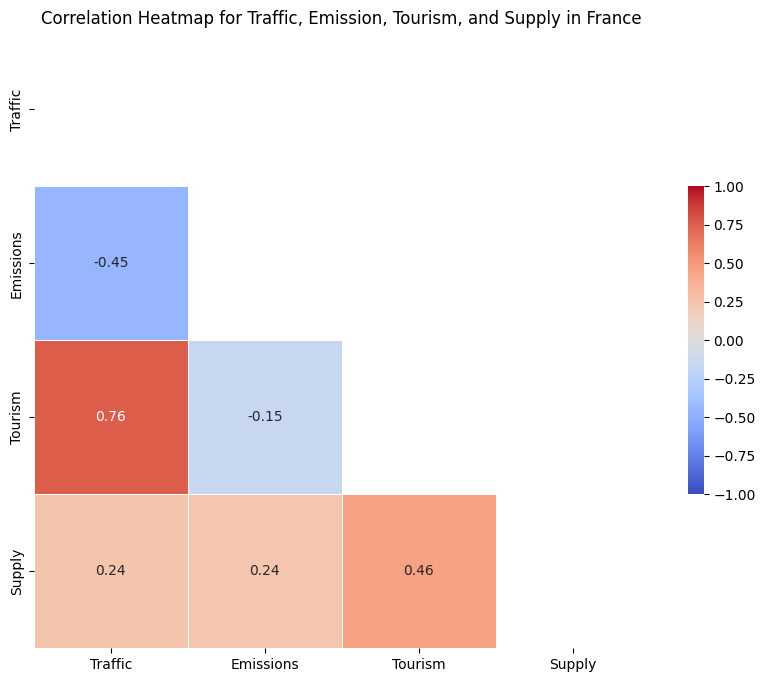

In [107]:
# Merge the dataframes based on the TIME_PERIOD column
merged_BG = traffic_BG[['TIME_PERIOD', 'OBS_VALUE']].rename(columns={'OBS_VALUE': 'Traffic'})
merged_BG = pd.merge(merged_BG, emissions_BG[['TIME_PERIOD', 'OBS_VALUE']], on='TIME_PERIOD', how='left').rename(columns={'OBS_VALUE': 'Emissions'})
merged_BG = pd.merge(merged_BG, tourism_BG[['TIME_PERIOD', 'OBS_VALUE']], on='TIME_PERIOD', how='left').rename(columns={'OBS_VALUE': 'Tourism'})
merged_BG = pd.merge(merged_BG, supply_BG[['TIME_PERIOD', 'OBS_VALUE']], on='TIME_PERIOD', how='left').rename(columns={'OBS_VALUE': 'Supply'})

corr = merged_FR.drop(columns='TIME_PERIOD').corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation Heatmap for Traffic, Emission, Tourism, and Supply in France')
plt.show()
